In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
airline = pd.read_csv('AirPassengers.csv', index_col ='Month', parse_dates = True)
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:]
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['#Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Thu, 20 Apr 2023   AIC                            896.027
Time:                                    05:34:41   BIC                            909.922
Sample:                                01-01-1949   HQIC                           901.669
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2982      0.076     -3.921      0.000      -0.447      -0.149
ar.S.L12       0.7105      0.238      2.989      0.003       0.245       1.176
ar.S.L24       0.2886      0.100      2.883      0.004       0.092       0.485
ma.S.L12      -0.9800      2.266     -0.433      0.665      -5.420       3.460
sigma2        88.2971    179.499      0.492      0.623    -263.515     440.109
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

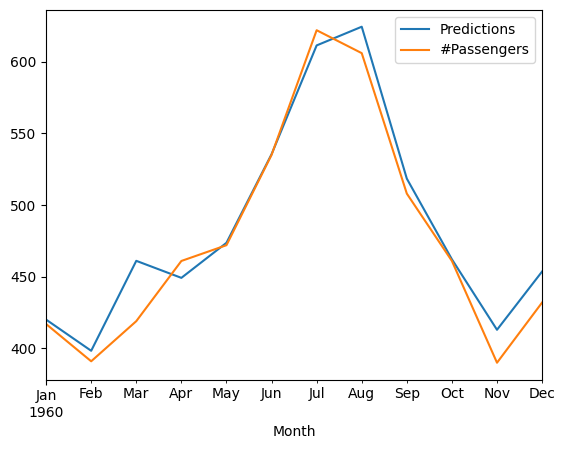

In [13]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

In [16]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(test["#Passengers"], predictions)

17.167115199421534

In [17]:
mean_squared_error(test["#Passengers"], predictions)

294.7098442702099

<Axes: xlabel='Month'>

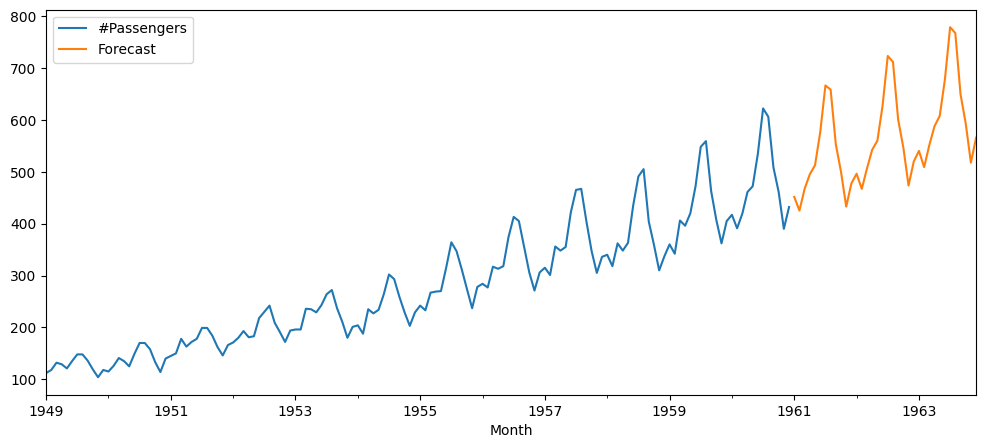

In [15]:
model = model = SARIMAX(airline['#Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
forecast = result.predict(start = len(airline), end = (len(airline)-1) + 3 * 12, typ = 'levels').rename('Forecast')
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)